/Users/caodinhduc/mypython/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in log10


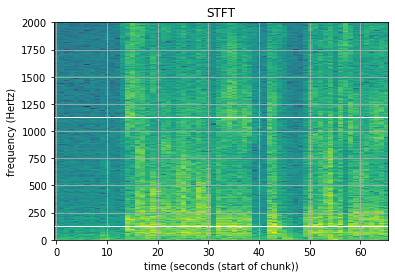

In [3]:
import numpy as np
from fft import fft2, rfftfreq, separate


def stft(x, LWindows, overlap, Nfft=None):
    """
    Short-time Fourier transform: convert a 1D vector to a 2D array
    The short-time Fourier transform (STFT) breaks a long vector into
    chunks (overlap) and runs an FFT (Fast Fourier Transform) on each chunk.
    The resulting 2D array can 
    Parameters
    ----------
    x : array_like
        Input signal (expected to be real)
    LWindow : int
        Length of each window (chunk of the signal). Should be ≪ `len(x)`.
    Nfft : int, optional
        Zero-pad each chunk to this length before FFT. Should be ≥ `LWindow`,
        (usually with small prime factors, for fastest FFT). Default: `LWindow`.
    Returns
    -------
    out : complex ndarray
        `len(x) // LWindow` by `Nfft` complex array representing the STFT of `x`.
    """
    Nfft = Nfft or LWindows
    Nwindows = x.size // LWindows

    arr = separate(x, Lwindows=LWindows, overlap=int(LWindows * overlap))
    stft = fft2(arr)[0]
    
    return stft


def stftbins(x, LWindows, Nfft=None, d=1.0):
    """
    Time and frequency bins corresponding to short-time Fourier transform.
    Call this with the same arguments as `stft`, plus one extra argument: `d`
    sample spacing, to get the time and frequency axes that the output of
    `stft` correspond to.
    Parameters
    ----------
    x : array_like
        same as `stft`
    LWindows : int
        same as `stft`
    Nfft : int, optional
        same as `stft`
    d : float, optional
        Sample spacing of `x` (or 1 / sample frequency), units of seconds.
        Default: 1.0.
    Returns
    -------
    t : ndarray
        Array of length `len(x) // Nwin`, in units of seconds, corresponding to
        the first dimension (height) of the output of `stft`.
    f : ndarray
        Array of length `Nfft`, in units of Hertz, corresponding to the second
        dimension (width) of the output of `stft`.
    """
    Nfft = Nfft or LWindows
    Nwindows = x.size // LWindows

    t = np.arange(Nwindows) * (LWindows * d)
    f = rfftfreq(Nfft, d)
    
    return t, f


if __name__ == '__main__':
    
    # config number of samples, length of window and rate of overlap there
    N = 200000
    LWindows = 4000
    overlap = 1/4

    # Read data from file with to get samplerate and data
    from scipy.io import wavfile
    samplerate, x = wavfile.read('Kim_16K.wav')
    x =  x[ :N]
    # Test with Nfft bigger than Nwin
    Nfft = LWindows * 2
    s = stft(x, LWindows, overlap, Nfft=Nfft)

    try:
        import pylab as plt
        plt.imshow(10*np.log10(np.abs(np.transpose(s))), aspect="auto")
        plt.ylabel('frequency (Hertz)')
        plt.xlabel('time (seconds (start of chunk))')
        plt.title('STFT')
        plt.ylim(0, 2000)
        plt.grid()
        plt.show()
    except ModuleNotFoundError:
        pass

In [ ]:
wlength = 50ms
hope_length = 1/4 wlength
window: hamming

In [3]:
from scipy.io import wavfile
samplerate, x = wavfile.read('Kim_16K.wav')

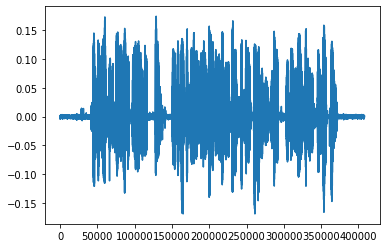

In [6]:
import pylab as plt
plt.plot(x)